In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Importing data, dealing with missing values & dropping duplicated rows

In [2]:
playstore_data = pd.read_csv("googleplaystore.csv")
print(f"There is {playstore_data.isna().any(axis=1).sum()} na rows in the dataset")

There is 1481 na rows in the dataset


In [3]:
playstore_data.dropna(inplace=True)
playstore_data.drop_duplicates(keep="first",inplace=True)
playstore_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
playstore_data["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

# Converting strings and objs into int and float(cast to numerical)

#### Installs "+" removal and converting to int

In [5]:
playstore_data["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [6]:
playstore_data.drop(index=playstore_data['Installs'][playstore_data['Installs'] == "Free"].index,inplace=True)
playstore_data['Installs'] = playstore_data['Installs'].str.replace('[+,]', '', regex=True).astype(np.int64)

#### Reviews numverical cast

In [7]:
playstore_data['Reviews'] = playstore_data['Reviews'].astype(np.int64)
Category_review = playstore_data.groupby("Category")["Reviews"].sum()

#### TimeSeries cast

In [8]:
playstore_data['Last Updated'] = pd.to_datetime(playstore_data['Last Updated'])

#### Installs "$" removal and converting to int

In [9]:
playstore_data.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [10]:
playstore_data['Price'] = playstore_data['Price'].str.replace('[$,]', '', regex=True).astype(np.float64)

# Calculating income generated by paid apps

In [11]:
playstore_data["Income"] = playstore_data.Price * playstore_data.Installs

# EDA & Data analysis

### <span style="background-color: black; color: red; padding: 5px;">Highes ratings in category</span>

In [12]:
Category_ratings = playstore_data.groupby("Category")["Rating"].mean()
Category_ratings.sort_values(ascending=False).reset_index()[:11]

,Category,Rating
0,EVENTS,4.435556
1,ART_AND_DESIGN,4.377049
2,EDUCATION,4.375969
3,BOOKS_AND_REFERENCE,4.347458
4,PERSONALIZATION,4.333117
5,PARENTING,4.300000
6,GAME,4.281285
7,BEAUTY,4.278571
8,HEALTH_AND_FITNESS,4.261450
9,SOCIAL,4.254918


### <span style="background-color: black; color: red; padding: 5px;">Highes installation in category</span>

In [13]:
Category_Installs = playstore_data.groupby("Category")["Installs"].sum()
Category_Installs.sort_values(ascending=False).reset_index()[:11]

,Category,Installs
0,GAME,31543862717
1,COMMUNICATION,24152241530
2,SOCIAL,12513841475
3,PRODUCTIVITY,12463070180
4,TOOLS,11450224500
5,FAMILY,10041080590
6,PHOTOGRAPHY,9721243130
7,TRAVEL_AND_LOCAL,6361859300
8,VIDEO_PLAYERS,6221897200
9,NEWS_AND_MAGAZINES,5393110650


### <span style="background-color: black; color: red; padding: 5px;">Highes review count submitted in category</span>

In [14]:
Category_review.sort_values(ascending=False).reset_index()[:11] 

,Category,Reviews
0,GAME,1415533878
1,COMMUNICATION,601273091
2,SOCIAL,533576498
3,FAMILY,396768541
4,TOOLS,273180158
5,PHOTOGRAPHY,204297367
6,VIDEO_PLAYERS,110379692
7,PRODUCTIVITY,102554240
8,SHOPPING,94930973
9,PERSONALIZATION,75192419


### <span style="background-color: black; color: red; padding: 5px;">Top 10 the most installed apps</span>

In [15]:
playstore_data.sort_values(by="Installs",ascending=False)[:11]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Income
5395,Google Photos,PHOTOGRAPHY,4.5,10847682,Varies with device,1000000000,Free,0.0,Everyone,Photography,2018-08-01,Varies with device,Varies with device,0.0
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,0.0
3816,Google News,NEWS_AND_MAGAZINES,3.9,877643,13M,1000000000,Free,0.0,Teen,News & Magazines,2018-08-01,5.2.0,4.4 and up,0.0
2853,Google Photos,PHOTOGRAPHY,4.5,10858538,Varies with device,1000000000,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device,0.0
3234,Google,TOOLS,4.4,8033493,Varies with device,1000000000,Free,0.0,Everyone,Tools,2018-08-03,Varies with device,Varies with device,0.0
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,1000000000,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device,0.0
3223,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235373,Varies with device,1000000000,Free,0.0,Everyone,Travel & Local,2018-07-31,Varies with device,Varies with device,0.0
3736,Google News,NEWS_AND_MAGAZINES,3.9,877635,13M,1000000000,Free,0.0,Teen,News & Magazines,2018-08-01,5.2.0,4.4 and up,0.0
3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,Varies with device,1000000000,Free,0.0,Teen,Video Players & Editors,2018-08-06,Varies with device,Varies with device,0.0
411,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9643041,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,0.0


### <span style="background-color: black; color: red; padding: 5px;">Relation between review count and ratings</span>

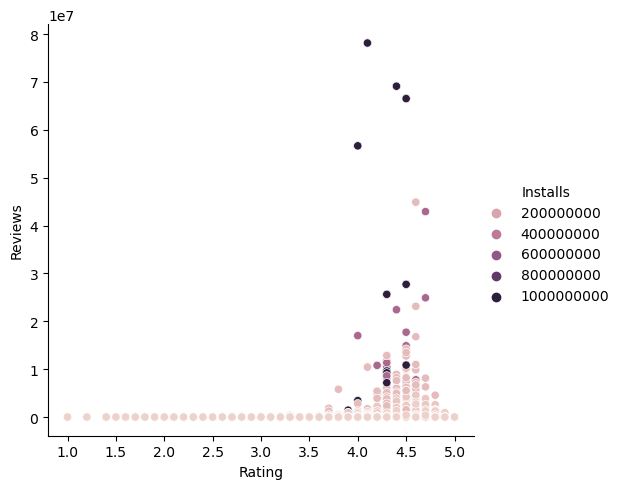

In [16]:
sns.relplot(y=playstore_data.Reviews,x=playstore_data.Rating,hue=playstore_data.Installs)

### <span style="background-color: black; color: red; padding: 5px;">Top 10 apps in the google play store based on customer survey</span>

In [17]:
playstore_data.sort_values(by=["Reviews", "Rating"], ascending=[False, False])[:11]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Income
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device,0.0
3943,Facebook,SOCIAL,4.1,78128208,Varies with device,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device,0.0
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,0.0
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,0.0
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,1000000000,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device,0.0
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,1000000000,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device,0.0
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,1000000000,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device,0.0
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,0.0
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,0.0
1879,Clash of Clans,GAME,4.6,44893888,98M,100000000,Free,0.0,Everyone 10+,Strategy,2018-07-15,10.322.16,4.1 and up,0.0


### <span style="background-color: black; color: red; padding: 5px;">Top 10 <b>PAID</b> apps in the google play store based on customer survey</span>

In [18]:
playstore_data[playstore_data.Price != 0].sort_values(by=["Reviews", "Rating"], ascending=[False, False])[:11]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Income
2241,Minecraft,FAMILY,4.5,2376564,Varies with device,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,2018-07-24,1.5.2.1,Varies with device,69900000.0
4347,Minecraft,FAMILY,4.5,2375336,Varies with device,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,2018-07-24,1.5.2.1,Varies with device,69900000.0
4034,Hitman Sniper,GAME,4.6,408292,29M,10000000,Paid,0.99,Mature 17+,Action,2018-07-12,1.7.110758,4.1 and up,9900000.0
7417,Grand Theft Auto: San Andreas,GAME,4.4,348962,26M,1000000,Paid,6.99,Mature 17+,Action,2015-03-21,1.08,3.0 and up,6990000.0
8860,Bloons TD 5,FAMILY,4.6,190086,94M,1000000,Paid,2.99,Everyone,Strategy,2018-07-13,3.16,2.3.3 and up,2990000.0
9678,Where's My Water?,FAMILY,4.7,188740,69M,1000000,Paid,1.99,Everyone,Puzzle;Brain Games,2018-07-05,1.16.0,4.2 and up,1990000.0
2242,Card Wars - Adventure Time,FAMILY,4.3,129603,23M,1000000,Paid,2.99,Everyone 10+,Card;Action & Adventure,2016-02-11,1.11.0,2.3.3 and up,2990000.0
5490,True Skate,SPORTS,4.4,129409,73M,1000000,Paid,1.99,Everyone,Sports,2018-08-04,1.5.1,4.0.3 and up,1990000.0
5631,Five Nights at Freddy's,GAME,4.6,100805,50M,1000000,Paid,2.99,Teen,Action,2014-12-02,1.85,2.3 and up,2990000.0
3403,Beautiful Widgets Pro,PERSONALIZATION,4.2,97890,14M,1000000,Paid,2.49,Everyone,Personalization,2016-08-24,5.7.8,2.3 and up,2490000.0


### <span style="background-color: black; color: red; padding: 5px;">Relation between the price and ratings</span>

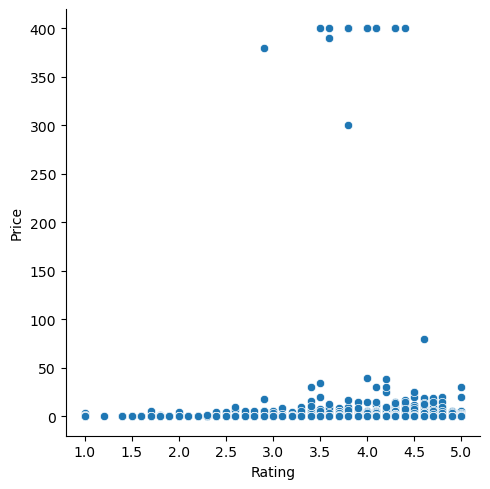

In [19]:
sns.relplot(x=playstore_data.Rating,y=playstore_data.Price)

### <span style="background-color: black; color: red; padding: 5px;">Average paid apps price</span> : <span style="background-color: black; color: red; padding: 5px;">13.94$</span>

In [20]:
playstore_data[playstore_data.Price != 0].Price.mean()

14.012913256955812

### <span style="background-color: black; color: red; padding: 5px;">Highest-paid apps based on catagory</span>

In [21]:
Category_price = playstore_data.groupby("Category")["Price"].mean()
Category_price.sort_values(ascending=False).reset_index()[:11] 

,Category,Price
0,FINANCE,7.696751
1,LIFESTYLE,6.429115
2,MEDICAL,2.148543
3,FAMILY,1.328940
4,PERSONALIZATION,0.401883
5,WEATHER,0.392400
6,SPORTS,0.325909
7,TOOLS,0.283629
8,GAME,0.261043
9,PHOTOGRAPHY,0.250855


### <span style="background-color: black; color: red; padding: 5px;">Highest saled paid apps by income</span>

In [22]:
playstore_data.sort_values(by="Income",ascending=False).reset_index()[:11]

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Income
0,4347,Minecraft,FAMILY,4.5,2375336,Varies with device,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,2018-07-24,1.5.2.1,Varies with device,69900000.0
1,2241,Minecraft,FAMILY,4.5,2376564,Varies with device,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,2018-07-24,1.5.2.1,Varies with device,69900000.0
2,5351,I am rich,LIFESTYLE,3.8,3547,1.8M,100000,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up,39999000.0
3,5356,I Am Rich Premium,FINANCE,4.1,1867,4.7M,50000,Paid,399.99,Everyone,Finance,2017-11-12,1.6,4.0 and up,19999500.0
4,4034,Hitman Sniper,GAME,4.6,408292,29M,10000000,Paid,0.99,Mature 17+,Action,2018-07-12,1.7.110758,4.1 and up,9900000.0
5,7417,Grand Theft Auto: San Andreas,GAME,4.4,348962,26M,1000000,Paid,6.99,Mature 17+,Action,2015-03-21,1.08,3.0 and up,6990000.0
6,2883,Facetune - For Free,PHOTOGRAPHY,4.4,49553,48M,1000000,Paid,5.99,Everyone,Photography,2018-07-25,1.3.1,4.1 and up,5990000.0
7,5578,Sleep as Android Unlock,LIFESTYLE,4.5,23966,872k,1000000,Paid,5.99,Everyone,Lifestyle,2018-06-27,20180608,4.0 and up,5990000.0
8,8804,DraStic DS Emulator,GAME,4.6,87766,12M,1000000,Paid,4.99,Everyone,Action,2016-07-19,r2.5.0.3a,2.3 and up,4990000.0
9,4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up,4000000.0


### <span style="background-color: black; color: red; padding: 5px;">Total of apps in each catagory</span>

In [23]:
playstore_data.Category.value_counts().reset_index()

,Category,count
0,FAMILY,1717
1,GAME,1074
2,TOOLS,733
3,PRODUCTIVITY,334
4,FINANCE,317
5,PERSONALIZATION,308
6,COMMUNICATION,307
7,LIFESTYLE,305
8,PHOTOGRAPHY,304
9,MEDICAL,302


### <span style="background-color: black; color: red; padding: 5px;">Histogram of price of apps</span>

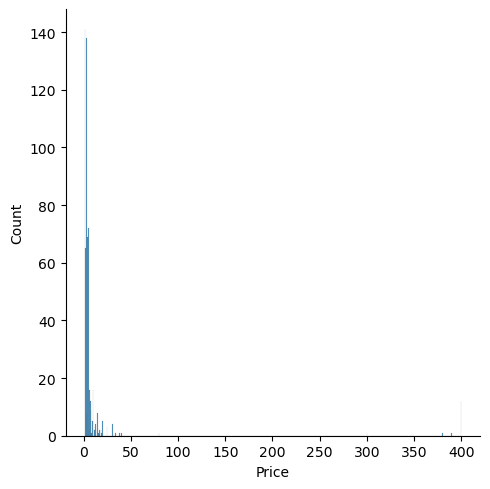

In [24]:
sns.displot(playstore_data.Price[playstore_data.Price != 0],kind="hist")

### <span style="background-color: black; color: red; padding: 5px;">The up-trend of downloading from google play store</span>

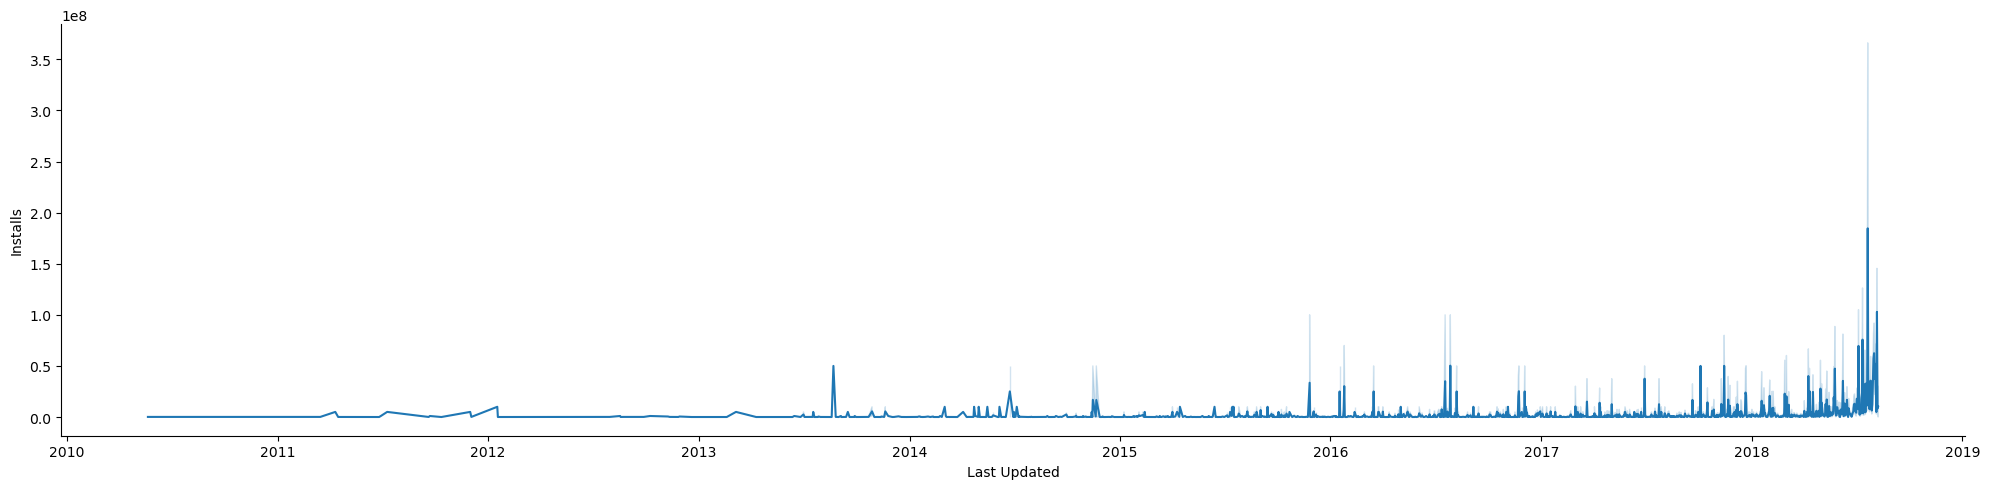

In [25]:
sns.relplot(x=playstore_data['Last Updated'],y=playstore_data["Installs"],kind="line",aspect=4.0)

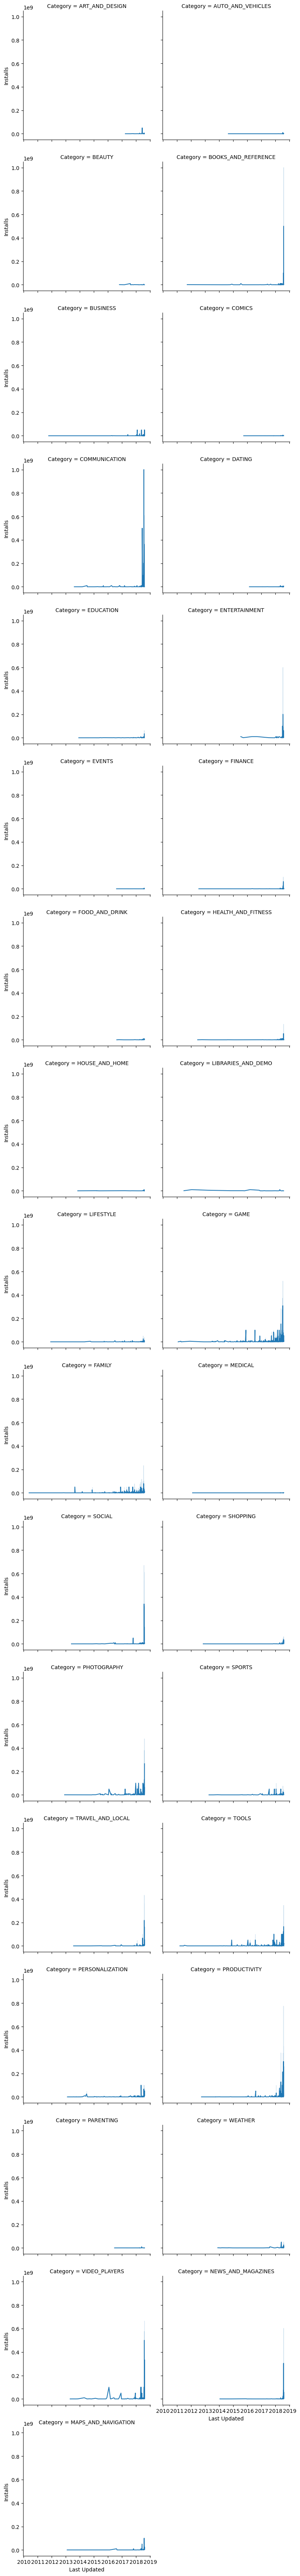

In [26]:
sns.relplot(
    x='Last Updated', 
    y='Installs', 
    kind='line', 
    data=playstore_data,
    col='Category', 
    col_wrap=2,  
    height=4,    
    aspect=1
)

### <span style="background-color: black; color: red; padding: 5px;">The role of updating in user satisfaction</span>

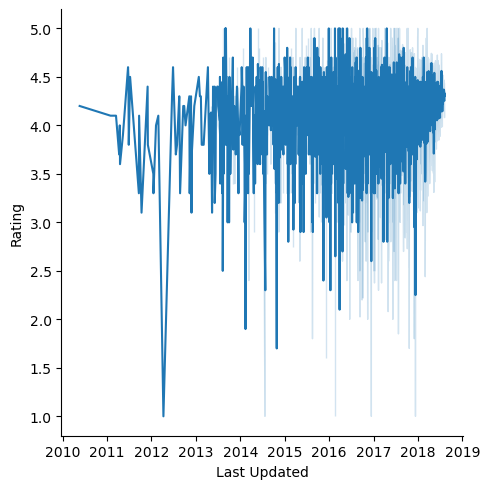

In [27]:
sns.relplot(x=playstore_data['Last Updated'],y=playstore_data["Rating"],kind="line")